In [1]:
!pip3 freeze > requirements.txt

## Input Dataset


In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/mdismielhossenabir/sentiment-analysis")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aldiiiyg
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mdismielhossenabir/sentiment-analysis


100%|██████████| 14.3k/14.3k [00:00<00:00, 27.4MB/s]

## Import Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Load Dataset

In [5]:
df = pd.read_csv("/content/sentiment-analysis/sentiment_analysis.csv")
df = df[['text', 'sentiment']]

df

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative
...,...,...
494,"According to , a quarter of families under six...",negative
495,the plan to not spend money is not going well,negative
496,uploading all my bamboozle pictures of facebook,neutral
497,congratulations ! you guys finish a month ear...,positive


sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

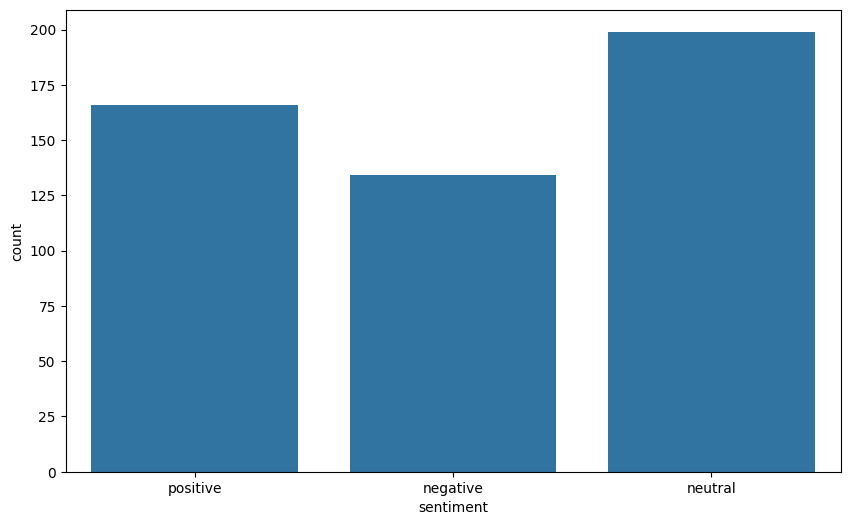

In [6]:
# visualization label
plt.figure(figsize=(10, 6))
print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)

In [7]:
# change sentiment to numeric (encode)
label_sentiment = {"positive" : 2, "neutral" : 1, "negative" : 0}
df['sentiment'] = df['sentiment'].map(label_sentiment)

In [8]:
df

,text,sentiment
0,What a great day!!! Looks like dream.,2
1,"I feel sorry, I miss you here in the sea beach",2
2,Don't angry me,0
3,We attend in the class just for listening teac...,0
4,"Those who want to go, let them go",0
...,...,...
494,"According to , a quarter of families under six...",0
495,the plan to not spend money is not going well,0
496,uploading all my bamboozle pictures of facebook,1
497,congratulations ! you guys finish a month ear...,2


## Cleaning Data

In [9]:
# check duplicate data

duplicate_data = df.duplicated(subset=["text"]).sum()
print(f"Duplicate Data: {duplicate_data}")

Duplicate Data: 105


In [10]:
# Drop Duplicate
df.drop_duplicates(inplace = True)

delete_duplicate = df.duplicated(subset=["text"]).sum()
print(f"Duplicate Data: {delete_duplicate}")

Duplicate Data: 0


In [11]:
# check missing value
df.isnull().sum()

,0
text,0
sentiment,0


In [12]:
# remove NaN values
df = df.dropna(axis=0)
df.isnull().sum()

,0
text,0
sentiment,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 498
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       394 non-null    object
 1   sentiment  394 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.2+ KB


In [14]:
df

,text,sentiment
0,What a great day!!! Looks like dream.,2
1,"I feel sorry, I miss you here in the sea beach",2
2,Don't angry me,0
3,We attend in the class just for listening teac...,0
4,"Those who want to go, let them go",0
...,...,...
494,"According to , a quarter of families under six...",0
495,the plan to not spend money is not going well,0
496,uploading all my bamboozle pictures of facebook,1
497,congratulations ! you guys finish a month ear...,2


sentiment
1    153
2    132
0    109
Name: count, dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

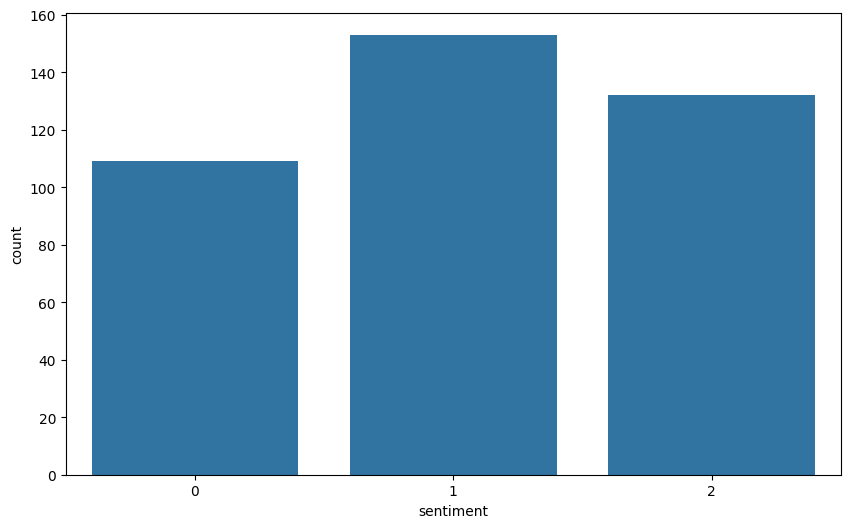

In [15]:
# visualization label after drop duplicate and missing value
plt.figure(figsize=(10, 6))
print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)

In [16]:
# Cleaning
def clean_text(text) :
  if not isinstance(text, str):  # cek jika bukan string
        return ''
  text = text.lower() #membuat huruf kecil semua
  text = text.strip() #remove spasi di awal dan akhir kalimat
  text = re.sub(r'http\S+', '', text) #menghapus url
  text = re.sub(r'[,./|-]()=+', ' ', text)  # tanda baca pemisah kata menjadi spasi
  text = re.sub(r'\n+', ' ', text)  # ganti satu atau lebih newline menjadi spasi
  text = re.sub(r'\d+', '', text) #remove angka
  text = re.sub(r'\s+', ' ', text) #remove spasi ganda
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) #remove mention
  text = re.sub(r'#[A-Za-z0-9_]+', '', text) #menghapus tagar
  text = re.sub(r'[^\x00-\x7F]+', ' ', text) #menghapus karakter non-ASCII seperti emoji
  text = text.translate(str.maketrans('','',string.punctuation)) #remove tanda baca/punctutation
  return text

df['cleaning'] = df['text'].apply(clean_text)

In [17]:
df

,text,sentiment,cleaning
0,What a great day!!! Looks like dream.,2,what a great day looks like dream
1,"I feel sorry, I miss you here in the sea beach",2,i feel sorry i miss you here in the sea beach
2,Don't angry me,0,dont angry me
3,We attend in the class just for listening teac...,0,we attend in the class just for listening teac...
4,"Those who want to go, let them go",0,those who want to go let them go
...,...,...,...
494,"According to , a quarter of families under six...",0,according to a quarter of families under six ...
495,the plan to not spend money is not going well,0,the plan to not spend money is not going well
496,uploading all my bamboozle pictures of facebook,1,uploading all my bamboozle pictures of facebook
497,congratulations ! you guys finish a month ear...,2,congratulations you guys finish a month early...


## Split Data

In [18]:
#split data training 80% and testing 20%

X_train, X_test, y_train, y_test = train_test_split(
    df["cleaning"],
    df["sentiment"],
    test_size=0.2,
    random_state=42
)

## Hugging Face Model

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [20]:
# add distilbert model

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
# tokenization data training
train_encodings = tokenizer(
    list(X_train),
    truncation=True,
    padding=True
)

# tokenization data testing
test_encodings = tokenizer(
    list(X_test),
    truncation=True,
    padding=True
)

In [22]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
  # define tokenization and label
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
  # get sample data based on index
    def __getitem__(self, idx):
        item = {
            key: torch.tensor(val[idx])
            for key, val in self.encodings.items()
        }
        # add label
        item["labels"] = torch.tensor(self.labels.iloc[idx])
        return item
  # return total data
    def __len__(self):
        return len(self.labels)

In [23]:
# dataset for training
train_dataset = SentimentDataset(train_encodings, y_train)
# dataset for testing
test_dataset = SentimentDataset(test_encodings, y_test)

## Train Model

In [24]:
from transformers import Trainer, TrainingArguments

# Setup training model
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=15,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_steps=50,
    save_steps=500,
    report_to="none"
)

# Create Training Model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
50,0.867800
100,0.205200
150,0.019700
200,0.009700
250,0.009300
300,0.007600


TrainOutput(global_step=300, training_loss=0.18653585056463878, metrics={'train_runtime': 1026.1485, 'train_samples_per_second': 4.605, 'train_steps_per_second': 0.292, 'total_flos': 45232472599650.0, 'train_loss': 0.18653585056463878, 'epoch': 15.0})

## Evaluation Model

In [25]:
# Evaluation Model Results
predict_output = trainer.predict(test_dataset)
prediction = np.argmax(predict_output.predictions, axis=1)

# define accuracy
accuracy = accuracy_score(y_test, prediction)
print(f"Model Accuracy: {accuracy}")

# classification report
print(classification_report(y_test, prediction))

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Model Accuracy: 0.7848101265822784
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.75      0.75      0.75        28
           2       0.79      0.84      0.81        31

    accuracy                           0.78        79
   macro avg       0.79      0.78      0.78        79
weighted avg       0.79      0.78      0.78        79



In [26]:
# prediction sentence
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits
    pred = torch.argmax(logits, dim=1).item()

    label_map_rev = {0:"negative", 1:"neutral", 2:"positive"}
    return label_map_rev[pred]

# testing sentence
test_sentence = "this is so bad"
print("Sentence:", test_sentence)
print("Prediction:", predict_sentiment(test_sentence))

Sentence: this is so bad
Prediction: negative


## Embedding

In [27]:
from sentence_transformers import SentenceTransformer

# Create Embeddings model
embed_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
# Convert data to vector embedding
embeddings = embed_model.encode(df["cleaning"].tolist())

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [28]:
embeddings.shape

(394, 384)

## FAISS

In [29]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 19.6 MB/s eta 0:00:00


In [30]:
import faiss

# get embedding dimension
d = embeddings.shape[1]
# create faiss index
index = faiss.IndexFlatL2(d)
# adding embeddings to index
index.add(embeddings.astype("float32"))

In [31]:
column_to_show = "cleaning"

query = "happy always"
query_emb = embed_model.encode([query])

# Search 5 nearest sentence
D, I = index.search(query_emb.astype("float32"), k=5)

print("Query:", query)
print("\nEmbedding:", query_emb)
for idx in I[0]:
    text_data = df.iloc[idx][column_to_show]
    label_data = df.iloc[idx]["sentiment"]
    label_name = "negative" if label_data == 0 else "neutral" if label_data == 1 else "positive"

    print("\nNearest data: ", text_data)
    print("Label:", label_name)

Query: happy always

Embedding: [[-7.59203061e-02  1.09900102e-01 -1.35355210e-03  7.15142628e-03
   2.58582854e-03 -5.58953099e-02  7.63693750e-02 -4.56866957e-02
   1.48669304e-02 -4.96761082e-03  9.68844667e-02  3.76211405e-02
  -9.17097146e-04  5.96698932e-02 -5.26332855e-02  4.50432822e-02
  -4.80145067e-02 -5.67895174e-02 -3.66797298e-02  3.38028148e-02
  -1.07644461e-01 -5.12913875e-02 -6.04450004e-03  7.33897043e-03
  -6.15966171e-02  6.85048848e-02  5.34756146e-02  1.23169059e-02
   8.33928958e-02 -2.84016170e-02 -3.64729613e-02  3.09536587e-02
   4.74565253e-02  3.03204525e-02  1.20841954e-02 -3.77943926e-02
  -7.69777894e-02 -7.14500770e-02 -6.34094561e-03  3.15443091e-02
  -2.02100631e-02 -4.95068282e-02 -1.26119675e-02 -5.25884032e-02
  -3.16559859e-02  6.31368980e-02  7.76887313e-02  3.59835452e-03
   9.24875513e-02  4.58155721e-02 -1.44730462e-02  1.98661927e-02
  -2.74583083e-02 -2.32660994e-02  7.43469223e-02  1.07738137e-01
   3.83288227e-02  1.05492286e-02  5.3459946